In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt
import imutils
from sklearn.cluster import KMeans

In [ ]:
image = cv2.imread("roy.png")
image.shape

(472, 544, 3)

In [ ]:
517 * 585

302445

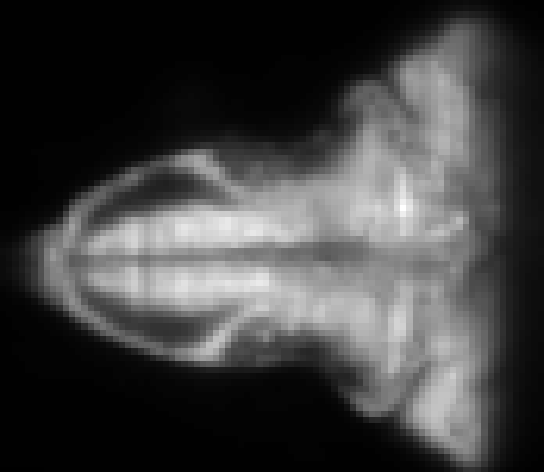

In [ ]:
cv2_imshow(image)

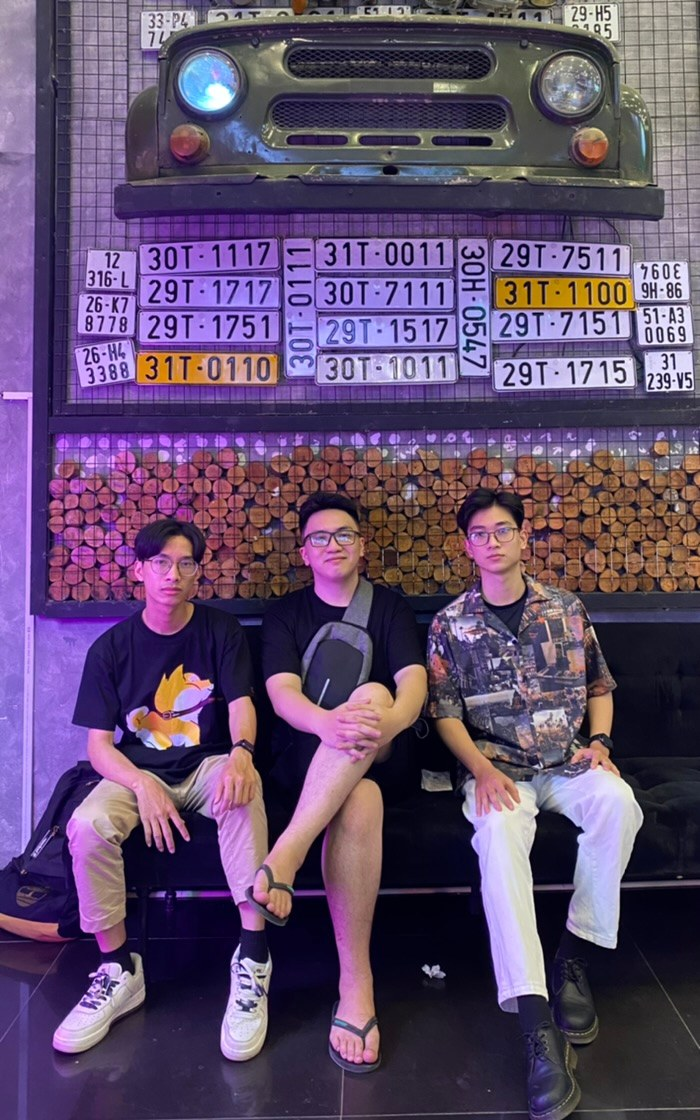

In [ ]:
bg = cv2.imread("bede.jpg")
cv2_imshow(bg)

In [ ]:
def add_image_to_bg(image, bg):
    rows, cols, channels = image.shape
    roi = bg[0:rows, 0:cols]
    img2gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    img2_fg = cv2.bitwise_and(image, image, mask=mask)
    dst = cv2.add(img1_bg, img2_fg)
    bg[0:rows, 0:cols] = dst
    return bg

In [ ]:
bg_copy = bg.copy()
result = add_image_to_bg(image, bg)

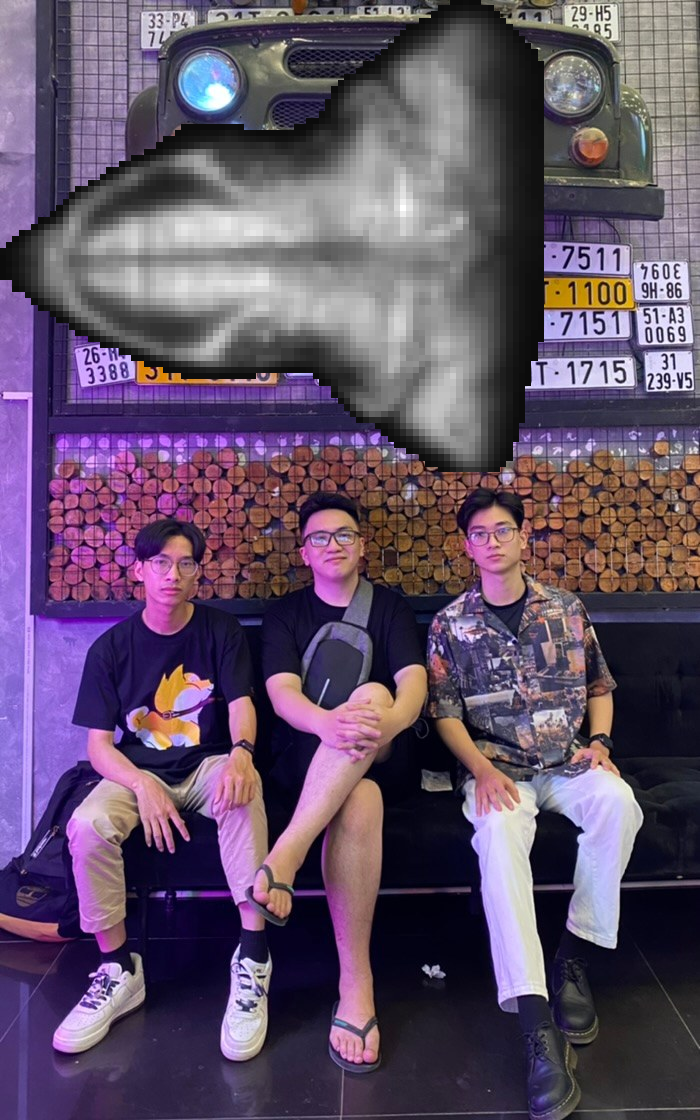

In [ ]:
cv2_imshow(result)

In [ ]:
cv2.imwrite("result.jpg", result)

True

In [ ]:
def color_extraction(img, k):
    img = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
    clt = KMeans(n_clusters=k, max_iter=100)
    clt.fit(img)
    label_indx = np.arange(0, len(np.unique(clt.labels_)) + 1)
    hist, _ = np.histogram(clt.labels_, bins=label_indx)
    hist = hist.astype("float")
    hist /= hist.sum()
    hist_bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    list_hex = []
    ws = []
    for (percent, color) in zip(hist, clt.cluster_centers_):
        endX = startX + (percent * 300)  # to match grid
        cv2.rectangle(hist_bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        color_to_hex = lambda rgb: "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])
        list_hex.append(color_to_hex(color.astype("uint8")))
        w = int(endX) - int(startX)
        ws.append(w)
        startX = endX
    return hist_bar, list_hex, ws

In [ ]:
hist_bar, list_hex, ws = color_extraction(result, k=16)

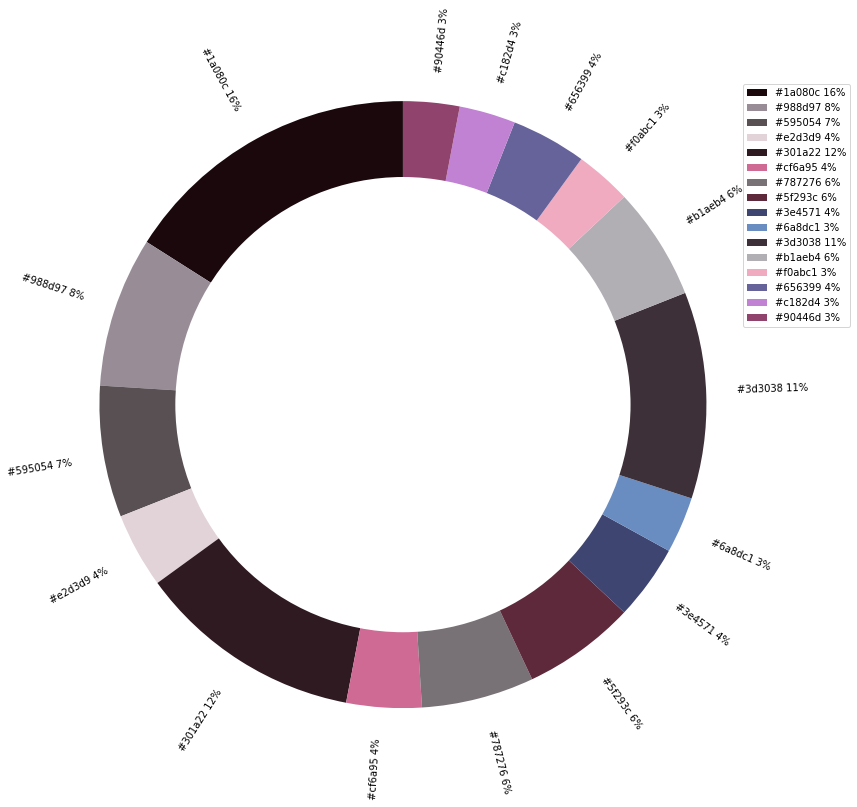

In [ ]:
datas = [round(w / sum(ws) * 100) for w in ws]
labels_new = [f"{list_hex[i]} {datas[i]}%" for i in range(len(ws))]
fig1, ax1 = plt.subplots()

ax1.pie(datas, shadow=False, startangle=90, colors=list_hex, labels=labels_new, rotatelabels=True)  # No labels or %s
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(12, 12)
circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)

plt.legend(labels=labels_new, 
           bbox_to_anchor=(1,1))

plt.show()

In [ ]:
fig1.savefig("color_pie.png")